In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from datetime import datetime
from collections import Counter
import math

In [2]:
path = "dataset/test.csv"
df = pd.read_csv(path)
# df.dropna(subset=['rain_sum (mm)'], axis=0, inplace=True)
df.reset_index(inplace=True)
df.drop(columns=['id','index'],inplace=True)
df.head()

,time,temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),sunrise (iso8601),sunset (iso8601),shortwave_radiation_sum (MJ/m²),snowfall_sum (cm),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm),elevation,city
0,2021-08-02,32.3,25.3,38.2,29.6,2021-08-02T05:39,2021-08-02T17:30,20.79,0.0,7.6,16.9,134.0,4.45,0,su
1,2021-08-03,31.7,25.5,37.4,30.3,2021-08-03T05:39,2021-08-03T17:30,20.01,0.0,10.2,21.6,131.0,4.32,0,su
2,2021-08-04,32.6,25.7,37.1,30.8,2021-08-04T05:39,2021-08-04T17:30,20.89,0.0,17.3,32.4,116.0,4.73,0,su
3,2021-08-05,32.0,25.7,36.8,31.1,2021-08-05T05:39,2021-08-05T17:30,22.19,0.0,15.8,29.2,115.0,4.96,0,su
4,2021-08-06,31.9,26.3,36.0,31.6,2021-08-06T05:38,2021-08-06T17:30,21.84,0.0,20.2,36.7,106.0,4.99,0,su


In [3]:
uniqcity = Counter(df.city)
mapping = {}
for i,city in enumerate(uniqcity):
    mapping[city] = i
colorlist = list(map(mapping.get, df.city))

In [4]:
df.isnull().values.any()

False

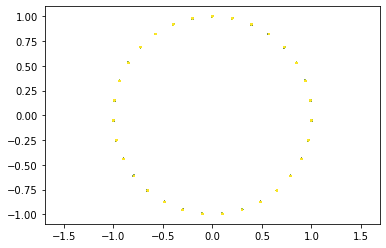

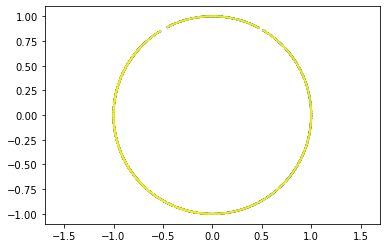

In [5]:
cols = df.columns
df[cols[0]] = df[cols[0]].astype('string')
#encode date
yearis = []
monthis = []
dayis = []
for row in df.index :
    yearis.append(int(df[cols[0]][row].split('-')[0]))
    monthis.append(int(df[cols[0]][row].split('-')[1]))
    dayis.append(int(df[cols[0]][row].split('-')[2])) 

min(yearis),min(monthis),min(dayis)
mincount  = 2018*365 + 1*30 + 1*1

daysince = []
for row in df.index :
    dateval = yearis[row]*365 + monthis[row]*30 + dayis[row]*1
    datecount = dateval-mincount
    daysince.append(datecount)

maxday = max(dayis)
maxdmo = max(dayis)*max(monthis)
dayval = pd.Series(daysince)

sinday = np.sin(2*np.pi*dayval/maxday)
cosday = np.cos(2*np.pi*dayval/maxday)
sindmo = np.sin(2*np.pi*dayval/maxdmo)
cosdmo = np.cos(2*np.pi*dayval/maxdmo)

plt.scatter(sinday,cosday,c=colorlist,s=1)
plt.axis('equal')
plt.show()
plt.scatter(sindmo,cosdmo,c=colorlist,s=1)
plt.axis('equal')
plt.show()

In [6]:
min(yearis), min(monthis), min(dayis)

(2021, 1, 1)

In [7]:
dateset = pd.DataFrame({'daysince': daysince, 'sinday': sinday, 'cosday': cosday, 'sindmo': sindmo, 'cosdmo': cosdmo, 'year' : yearis})

In [8]:
rise = df['sunrise (iso8601)']
set = df['sunset (iso8601)']
#encode rise and set
riseencode = []
setencode = []
validrise = []
validset = []

risehour = []
risemin = []
riseval = []
sethour = []
setmin = []
setval = []

for row in df.index :
    riseencode.append(datetime.fromisoformat(rise[row]).strftime("%m:%d:%Y:%H:%M:%S"))
    setencode.append(datetime.fromisoformat(set[row]).strftime("%m:%d:%Y:%H:%M:%S"))
    validrise.append(True) if '01:01:1970' in riseencode[row] else validrise.append(False)
    validset.append(True) if '01:01:1970' in setencode[row] else validset.append(False)

    if validrise[row] == False :
        riseencode[row] = riseencode[row][-8:].split(':')
    else :
        riseencode[row] = '00:00:00'.split(':')

    if validset[row] == False :
        setencode[row] = setencode[row][-8:].split(':')
    else :
        setencode[row] = '00:00:00'.split(':')
    
    risehour.append(int(riseencode[row][0]))
    risemin.append(int(riseencode[row][1]))

    sethour.append(int(setencode[row][0]))
    setmin.append(int(setencode[row][1]))

    riseval.append(risehour[row]*60 + risemin[row])
    setval.append(sethour[row]*60 + setmin[row])

In [9]:
index_range = df.loc[df['city'] == 'q'].index
validnum = sum(map(lambda x: riseval[x] != 0, index_range))

avgrise = sum(riseval[min(index_range):max(index_range)])//validnum
avgset = sum(setval[min(index_range):max(index_range)])//validnum

for row in df.index :
    riseval[row] = avgrise if riseval[row] == 0 else riseval[row]
    setval[row] = avgset if setval[row] == 0 else setval[row]

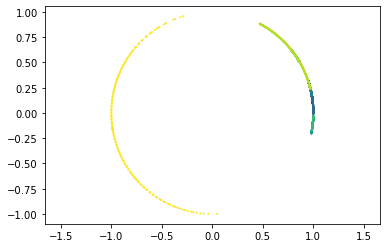

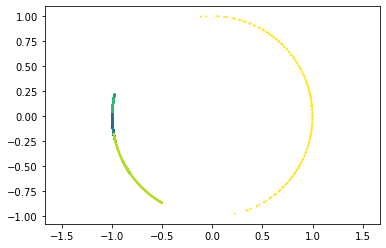

In [10]:
minperday = 24*60
riseval = pd.Series(riseval)
setval = pd.Series(setval)

sinrise = np.sin(2*np.pi*riseval/minperday)
cosrise = np.cos(2*np.pi*riseval/minperday)
sinset = np.sin(2*np.pi*setval/minperday)
cosset = np.cos(2*np.pi*setval/minperday)

plt.scatter(sinrise,cosrise,c=colorlist,s=1)
plt.axis('equal')
plt.show()
plt.scatter(sinset,cosset,c=colorlist,s=1)
plt.axis('equal')
plt.show()

In [11]:
riseset = pd.DataFrame({'sinrise': sinrise, 'cosrise': cosrise, 'sinset': sinset, 'cosset': cosset })
addset = dateset.join(riseset)
addset

,daysince,sinday,cosday,sindmo,cosdmo,year,sinrise,cosrise,sinset,cosset
0,1306,0.724793,0.688967,-0.067510,-0.997719,2021,0.995805,0.091502,-0.991445,-0.130526
1,1307,0.848644,0.528964,-0.084351,-0.996436,2021,0.995805,0.091502,-0.991445,-0.130526
2,1308,0.937752,0.347305,-0.101168,-0.994869,2021,0.995805,0.091502,-0.991445,-0.130526
3,1309,0.988468,0.151428,-0.117957,-0.993019,2021,0.995805,0.091502,-0.991445,-0.130526
4,1310,0.998717,-0.050649,-0.134711,-0.990885,2021,0.995396,0.095846,-0.991445,-0.130526
...,...,...,...,...,...,...,...,...,...,...
4967,1807,0.968077,-0.250653,-0.780325,0.625374,2022,-0.987688,-0.156434,0.994522,0.104528
4968,1808,0.897805,-0.440394,-0.769651,0.638465,2022,-0.987688,-0.156434,0.994522,0.104528
4969,1809,0.790776,-0.612106,-0.758758,0.651372,2022,-0.987688,-0.156434,0.994522,0.104528
4970,1810,0.651372,-0.758758,-0.747649,0.664095,2022,-0.987688,-0.156434,0.994522,0.104528


In [12]:
newdf = df
newdf = pd.concat([newdf.drop(columns=['time','sunrise (iso8601)','sunset (iso8601)']), addset],axis=1)
newdf = pd.get_dummies(newdf, columns=['city'])
newdf.head()

,temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),shortwave_radiation_sum (MJ/m²),snowfall_sum (cm),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm),...,city_b,city_le,city_lh,city_p,city_q,city_sa,city_si,city_su,city_t,city_u
0,32.3,25.3,38.2,29.6,20.79,0.0,7.6,16.9,134.0,4.45,...,0,0,0,0,0,0,0,1,0,0
1,31.7,25.5,37.4,30.3,20.01,0.0,10.2,21.6,131.0,4.32,...,0,0,0,0,0,0,0,1,0,0
2,32.6,25.7,37.1,30.8,20.89,0.0,17.3,32.4,116.0,4.73,...,0,0,0,0,0,0,0,1,0,0
3,32.0,25.7,36.8,31.1,22.19,0.0,15.8,29.2,115.0,4.96,...,0,0,0,0,0,0,0,1,0,0
4,31.9,26.3,36.0,31.6,21.84,0.0,20.2,36.7,106.0,4.99,...,0,0,0,0,0,0,0,1,0,0


In [15]:
newdf

,temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),shortwave_radiation_sum (MJ/m²),snowfall_sum (cm),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm),...,city_b,city_le,city_lh,city_p,city_q,city_sa,city_si,city_su,city_t,city_u
0,32.3,25.3,38.2,29.6,20.79,0.00,7.6,16.9,134.0,4.45,...,0,0,0,0,0,0,0,1,0,0
1,31.7,25.5,37.4,30.3,20.01,0.00,10.2,21.6,131.0,4.32,...,0,0,0,0,0,0,0,1,0,0
2,32.6,25.7,37.1,30.8,20.89,0.00,17.3,32.4,116.0,4.73,...,0,0,0,0,0,0,0,1,0,0
3,32.0,25.7,36.8,31.1,22.19,0.00,15.8,29.2,115.0,4.96,...,0,0,0,0,0,0,0,1,0,0
4,31.9,26.3,36.0,31.6,21.84,0.00,20.2,36.7,106.0,4.99,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4967,-6.9,-13.1,-13.5,-19.5,0.00,1.12,21.7,31.7,47.0,0.48,...,0,0,0,0,1,0,0,0,0,0
4968,-2.5,-6.8,-7.1,-13.4,0.00,1.40,21.6,31.0,64.0,0.51,...,0,0,0,0,1,0,0,0,0,0
4969,-4.6,-16.9,-9.0,-21.9,0.00,1.05,14.1,23.0,273.0,0.03,...,0,0,0,0,1,0,0,0,0,0
4970,-17.2,-21.2,-22.2,-26.5,0.00,0.00,10.8,19.1,293.0,0.00,...,0,0,0,0,1,0,0,0,0,0


In [16]:
hourdf = pd.read_csv('testhourproc.csv')
hourdf.drop(columns=['time','city','snowfall (cm)','et0_fao_evapotranspiration (mm)'],inplace=True)
hourdf

,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C),pressure_msl (hPa),surface_pressure (hPa),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),...,windgusts_10m (km/h),vapor_pressure_deficit (kPa),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³)
0,28.129167,65.166667,20.587500,33.250000,1011.025000,1013.325000,13.625000,8.000000,9.291667,2.666667,...,12.691667,1.423333,31.445833,30.625000,29.233333,28.600000,0.056500,0.077500,0.112500,0.234000
1,28.108333,69.000000,21.550000,33.533333,1012.091667,1014.391667,20.500000,5.833333,19.250000,12.458333,...,14.808333,1.270833,30.937500,30.591667,29.333333,28.600000,0.060958,0.076042,0.111583,0.233292
2,28.104167,70.083333,21.745833,33.483333,1012.350000,1014.650000,16.666667,6.250000,6.541667,23.416667,...,18.287500,1.235000,31.033333,30.558333,29.416667,28.687500,0.059542,0.074542,0.110917,0.233000
3,27.775000,70.500000,21.379167,33.458333,1012.679167,1014.979167,21.750000,2.916667,5.166667,53.333333,...,18.341667,1.225417,30.837500,30.487500,29.500000,28.700000,0.058500,0.073500,0.110375,0.232458
4,27.658333,71.625000,21.604167,33.237500,1012.279167,1014.579167,28.708333,2.125000,2.250000,84.833333,...,21.533333,1.176250,30.654167,30.400000,29.516667,28.700000,0.057750,0.072417,0.109458,0.232000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4967,-13.095833,54.875000,-20.366667,-16.125000,1029.095833,990.729167,95.166667,11.416667,99.458333,94.291667,...,28.716667,0.099167,-10.487500,-10.275000,-9.575000,-8.058333,0.264000,0.205000,0.237000,0.252000
4968,-7.391667,62.250000,-13.387500,-10.854167,1024.262500,986.762500,100.000000,51.541667,96.916667,95.291667,...,27.216667,0.133750,-10.308333,-10.183333,-9.600000,-8.100000,0.264000,0.205000,0.237000,0.252000
4969,-14.212500,75.583333,-17.600000,-17.979167,1033.783333,994.762500,73.916667,77.291667,17.333333,3.541667,...,14.933333,0.054167,-10.137500,-10.025000,-9.600000,-8.154167,0.264000,0.205000,0.237000,0.252000
4970,-20.237500,76.958333,-23.258333,-24.020833,1034.900000,994.970833,79.458333,79.250000,14.708333,0.000000,...,16.429167,0.029167,-10.462500,-10.183333,-9.600000,-8.200000,0.264000,0.205000,0.237000,0.252000


In [18]:
finaldf = pd.concat([newdf, hourdf],axis=1)
finaldf = finaldf.reset_index().drop(columns='index')
finaldf

,temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),shortwave_radiation_sum (MJ/m²),snowfall_sum (cm),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm),...,windgusts_10m (km/h),vapor_pressure_deficit (kPa),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³)
0,32.3,25.3,38.2,29.6,20.79,0.00,7.6,16.9,134.0,4.45,...,12.691667,1.423333,31.445833,30.625000,29.233333,28.600000,0.056500,0.077500,0.112500,0.234000
1,31.7,25.5,37.4,30.3,20.01,0.00,10.2,21.6,131.0,4.32,...,14.808333,1.270833,30.937500,30.591667,29.333333,28.600000,0.060958,0.076042,0.111583,0.233292
2,32.6,25.7,37.1,30.8,20.89,0.00,17.3,32.4,116.0,4.73,...,18.287500,1.235000,31.033333,30.558333,29.416667,28.687500,0.059542,0.074542,0.110917,0.233000
3,32.0,25.7,36.8,31.1,22.19,0.00,15.8,29.2,115.0,4.96,...,18.341667,1.225417,30.837500,30.487500,29.500000,28.700000,0.058500,0.073500,0.110375,0.232458
4,31.9,26.3,36.0,31.6,21.84,0.00,20.2,36.7,106.0,4.99,...,21.533333,1.176250,30.654167,30.400000,29.516667,28.700000,0.057750,0.072417,0.109458,0.232000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4967,-6.9,-13.1,-13.5,-19.5,0.00,1.12,21.7,31.7,47.0,0.48,...,28.716667,0.099167,-10.487500,-10.275000,-9.575000,-8.058333,0.264000,0.205000,0.237000,0.252000
4968,-2.5,-6.8,-7.1,-13.4,0.00,1.40,21.6,31.0,64.0,0.51,...,27.216667,0.133750,-10.308333,-10.183333,-9.600000,-8.100000,0.264000,0.205000,0.237000,0.252000
4969,-4.6,-16.9,-9.0,-21.9,0.00,1.05,14.1,23.0,273.0,0.03,...,14.933333,0.054167,-10.137500,-10.025000,-9.600000,-8.154167,0.264000,0.205000,0.237000,0.252000
4970,-17.2,-21.2,-22.2,-26.5,0.00,0.00,10.8,19.1,293.0,0.00,...,16.429167,0.029167,-10.462500,-10.183333,-9.600000,-8.200000,0.264000,0.205000,0.237000,0.252000


In [19]:
finaldf = finaldf.assign(
    temp_2m_diff = finaldf['temperature_2m_max (°C)']-finaldf['temperature_2m_min (°C)'],
    app_temp_diff = finaldf['apparent_temperature_max (°C)']-finaldf['apparent_temperature_min (°C)'],
    soil_temp = (finaldf['soil_temperature_0_to_7cm (°C)'] + finaldf['soil_temperature_7_to_28cm (°C)'] + finaldf['soil_temperature_28_to_100cm (°C)'] + finaldf['soil_temperature_100_to_255cm (°C)']) / 4,
    soil_moist = (finaldf['soil_moisture_0_to_7cm (m³/m³)'] + finaldf['soil_moisture_7_to_28cm (m³/m³)'] + finaldf['soil_moisture_28_to_100cm (m³/m³)'] + finaldf['soil_moisture_100_to_255cm (m³/m³)']) / 4,
    windspeed = (finaldf['windspeed_10m (km/h)'] + finaldf['windspeed_100m (km/h)']) /2,
    winddirect = (finaldf['winddirection_10m (°)'] + finaldf['winddirection_100m (°)']) /2,
    
).drop(columns=['temperature_2m_max (°C)', 'temperature_2m_min (°C)',
       'apparent_temperature_max (°C)', 'apparent_temperature_min (°C)','soil_temperature_0_to_7cm (°C)', 'soil_temperature_7_to_28cm (°C)',
       'soil_temperature_28_to_100cm (°C)',
       'soil_temperature_100_to_255cm (°C)', 'soil_moisture_0_to_7cm (m³/m³)',
       'soil_moisture_7_to_28cm (m³/m³)', 'soil_moisture_28_to_100cm (m³/m³)',
       'soil_moisture_100_to_255cm (m³/m³)','direct_radiation (W/m²)','shortwave_radiation_sum (MJ/m²)','cloudcover_mid (%)',
       'windspeed_10m (km/h)', 'windspeed_100m (km/h)','windspeed_10m_max (km/h)',
       'winddirection_10m (°)', 'winddirection_100m (°)','winddirection_10m_dominant (°)'])

In [22]:
finaldf

,snowfall_sum (cm),windgusts_10m_max (km/h),et0_fao_evapotranspiration (mm),elevation,daysince,sinday,cosday,sindmo,cosdmo,year,...,diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),windgusts_10m (km/h),vapor_pressure_deficit (kPa),temp_2m_diff,app_temp_diff,soil_temp,soil_moist,windspeed,winddirect
0,0.00,16.9,4.45,0,1306,0.724793,0.688967,-0.067510,-0.997719,2021,...,44.958333,291.091667,12.691667,1.423333,7.0,8.6,29.976042,0.120125,5.754167,135.875000
1,0.00,21.6,4.32,0,1307,0.848644,0.528964,-0.084351,-0.996436,2021,...,51.041667,267.291667,14.808333,1.270833,6.2,7.1,29.865625,0.120469,7.302083,150.979167
2,0.00,32.4,4.73,0,1308,0.937752,0.347305,-0.101168,-0.994869,2021,...,45.000000,296.183333,18.287500,1.235000,6.9,6.3,29.923958,0.119500,11.218750,132.583333
3,0.00,29.2,4.96,0,1309,0.988468,0.151428,-0.117957,-0.993019,2021,...,42.375000,318.204167,18.341667,1.225417,6.3,5.7,29.881250,0.118708,10.818750,131.791667
4,0.00,36.7,4.99,0,1310,0.998717,-0.050649,-0.134711,-0.990885,2021,...,47.583333,303.758333,21.533333,1.176250,5.6,4.4,29.817708,0.117906,13.679167,115.541667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4967,1.12,31.7,0.48,0,1807,0.968077,-0.250653,-0.780325,0.625374,2022,...,0.000000,0.000000,28.716667,0.099167,6.2,6.0,-9.598958,0.239500,22.537500,49.750000
4968,1.40,31.0,0.51,0,1808,0.897805,-0.440394,-0.769651,0.638465,2022,...,0.000000,0.000000,27.216667,0.133750,4.3,6.3,-9.547917,0.239500,21.531250,81.479167
4969,1.05,23.0,0.03,0,1809,0.790776,-0.612106,-0.758758,0.651372,2022,...,0.000000,0.000000,14.933333,0.054167,12.3,12.9,-9.479167,0.239500,9.800000,258.333333
4970,0.00,19.1,0.00,0,1810,0.651372,-0.758758,-0.747649,0.664095,2022,...,0.000000,0.000000,16.429167,0.029167,4.0,4.3,-9.611458,0.239500,9.272917,293.145833


In [ ]:
finaldf.to_csv('preptest1.csv')

In [14]:
# newdf.to_csv('proctest2.csv')